## 1) Περιγραφή των δεδομένων

##### Τα δεδομένα μου περιέχουν τα παρακάτω χαρακτηριστικά :
##### 1 - fixed acidity
##### 2 - volatile acidity
##### 3 - citric acid
##### 4 - residual sugar
##### 5 - chlorides
##### 6 - free sulfur dioxide
##### 7 - total sulfur dioxide
##### 8 - density
##### 9 - pH
##### 10- sulphates
##### 11 - alcohol
##### 12 - quality

## 2) Εισαγωγή των δεδομένων 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use("ggplot")  #using style ggplot
%matplotlib inline

In [44]:
df=pd.read_csv("winequality-red.csv",delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3) Περιγραφική Στατιστική

##### Στο σημείο αυτο παίρνουμε μια πρώτη εικόνα για τα δεδομένα μας. Παρατηρούμε οτι δέν υπάρχουν ελλειπούσες τιμές καθώς και οτι η βάση δεδομένων μου περιέχει 1599 δείγματα με το κάθε ενα να έχει 12 χαρακτηριστικά. Επίσης μπορούμε να δούμε κάποια στατιστικά χαρακτηριστικά για κάθε χαρακτηριστικό.

In [45]:
df.info() #Παίρνουμε κάποιες π΄ληροφορίες για τα δεδομένα μας

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
df.describe()#Περιγραφή των δεδομένων μας

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
df.isnull().sum()#Ελέγχουμε εάν υπάρχει κάποιο κενό κελί

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4) Συμπεράσματα Exploratory Analysis στα δεδομένα

##### Παρατηρώντας τα δεδομένα μου, βλέπουμε οτι υπάρχει μια ανισορροπία μεταξύ των δειγμάτων ανά κατηγορία. Αυτό είναι πρόβλημα διότι τα μη ισορροπημένα δεδομένα μπορούν να οδηγήσουν σε υπερπροσαρμογή και υποπροσαρμογη των αλγορίθμων.

In [48]:
df.quality.value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

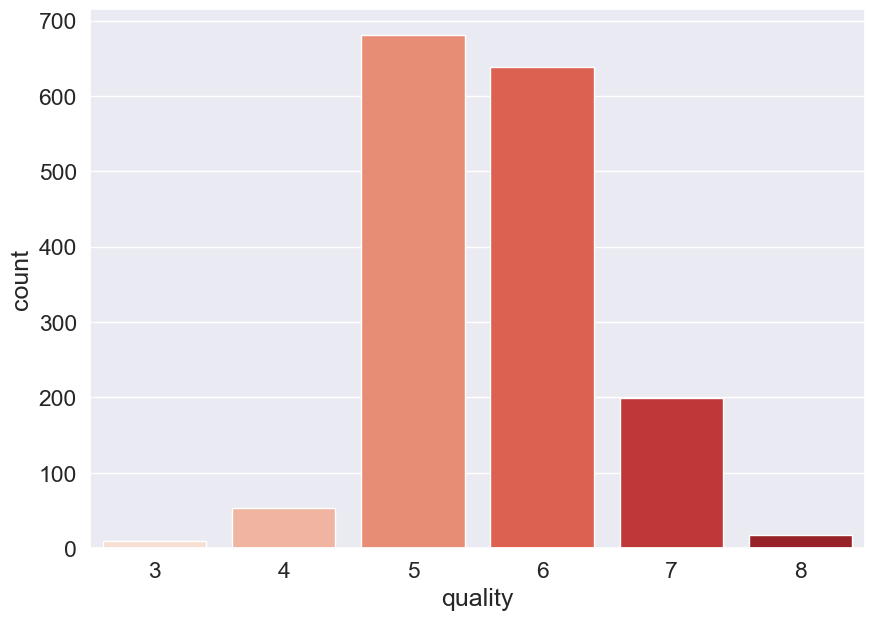

In [49]:
#Κάναμε το γράφημα για την κάθε ποιότητα κρασιού (3-8)
plt.figure(figsize=(10,7))
sns.countplot(x='quality',data=df,palette='Reds')
plt.show()

### 4.1) Έλεγχος συσχέτισης δεδομένων

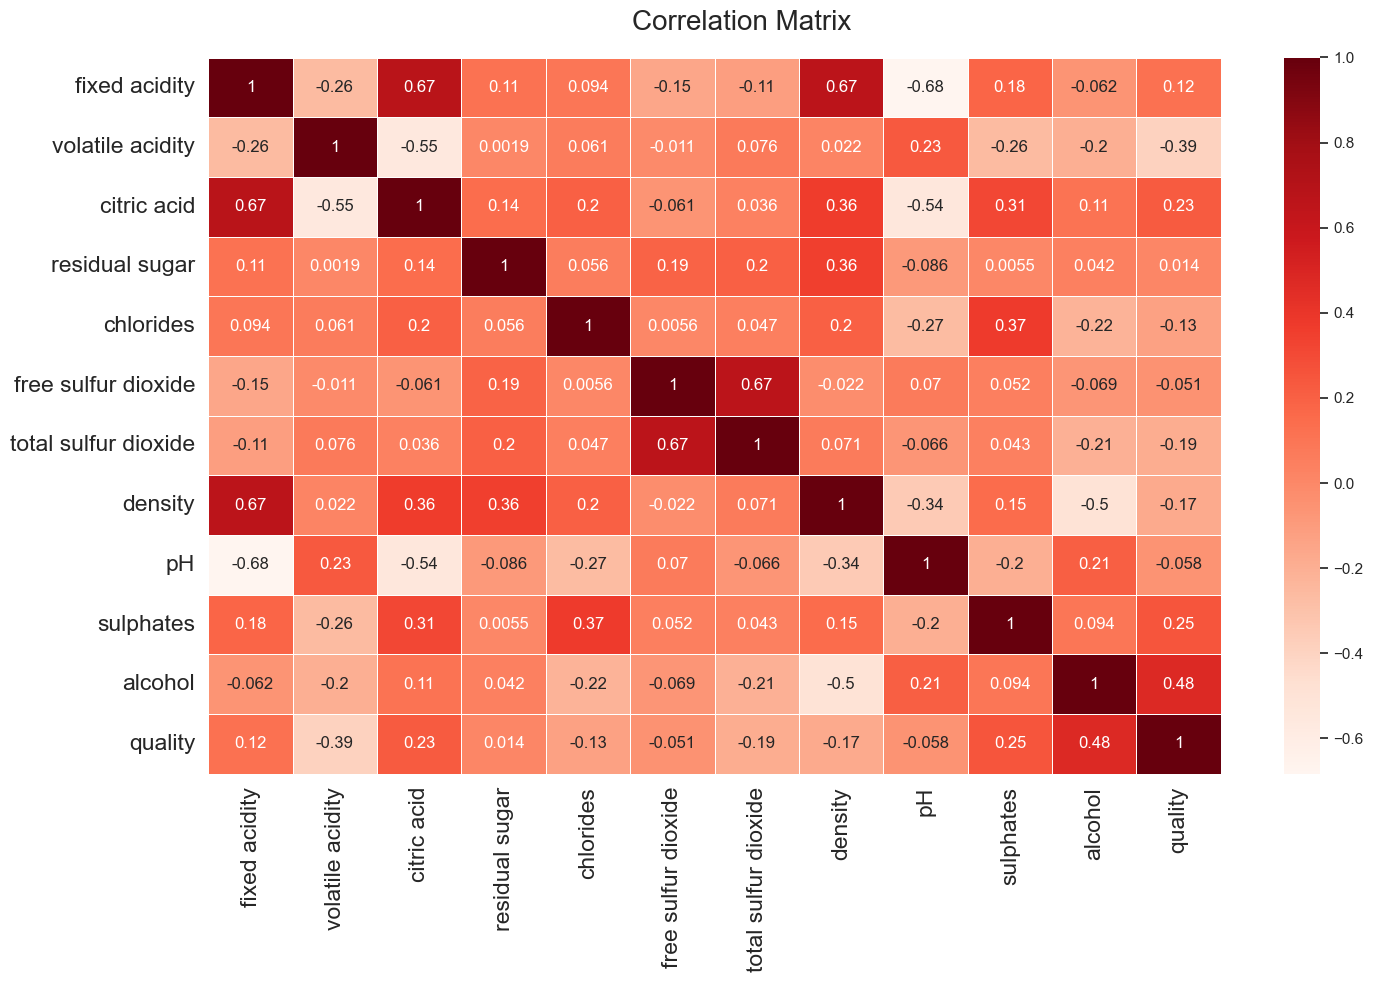

In [50]:
plt.subplots(figsize = (15,10))
sns.set(font_scale = 1)

hmap = sns.heatmap(data = df.corr(),
            annot = True,
            linewidths = .5,
            cmap = "Reds"
            )

plt.suptitle("Correlation Matrix", fontsize = 20)
plt.tight_layout()

In [51]:
corr = df.corr() 

print(corr['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


### 4.2) Θηκογράμματα

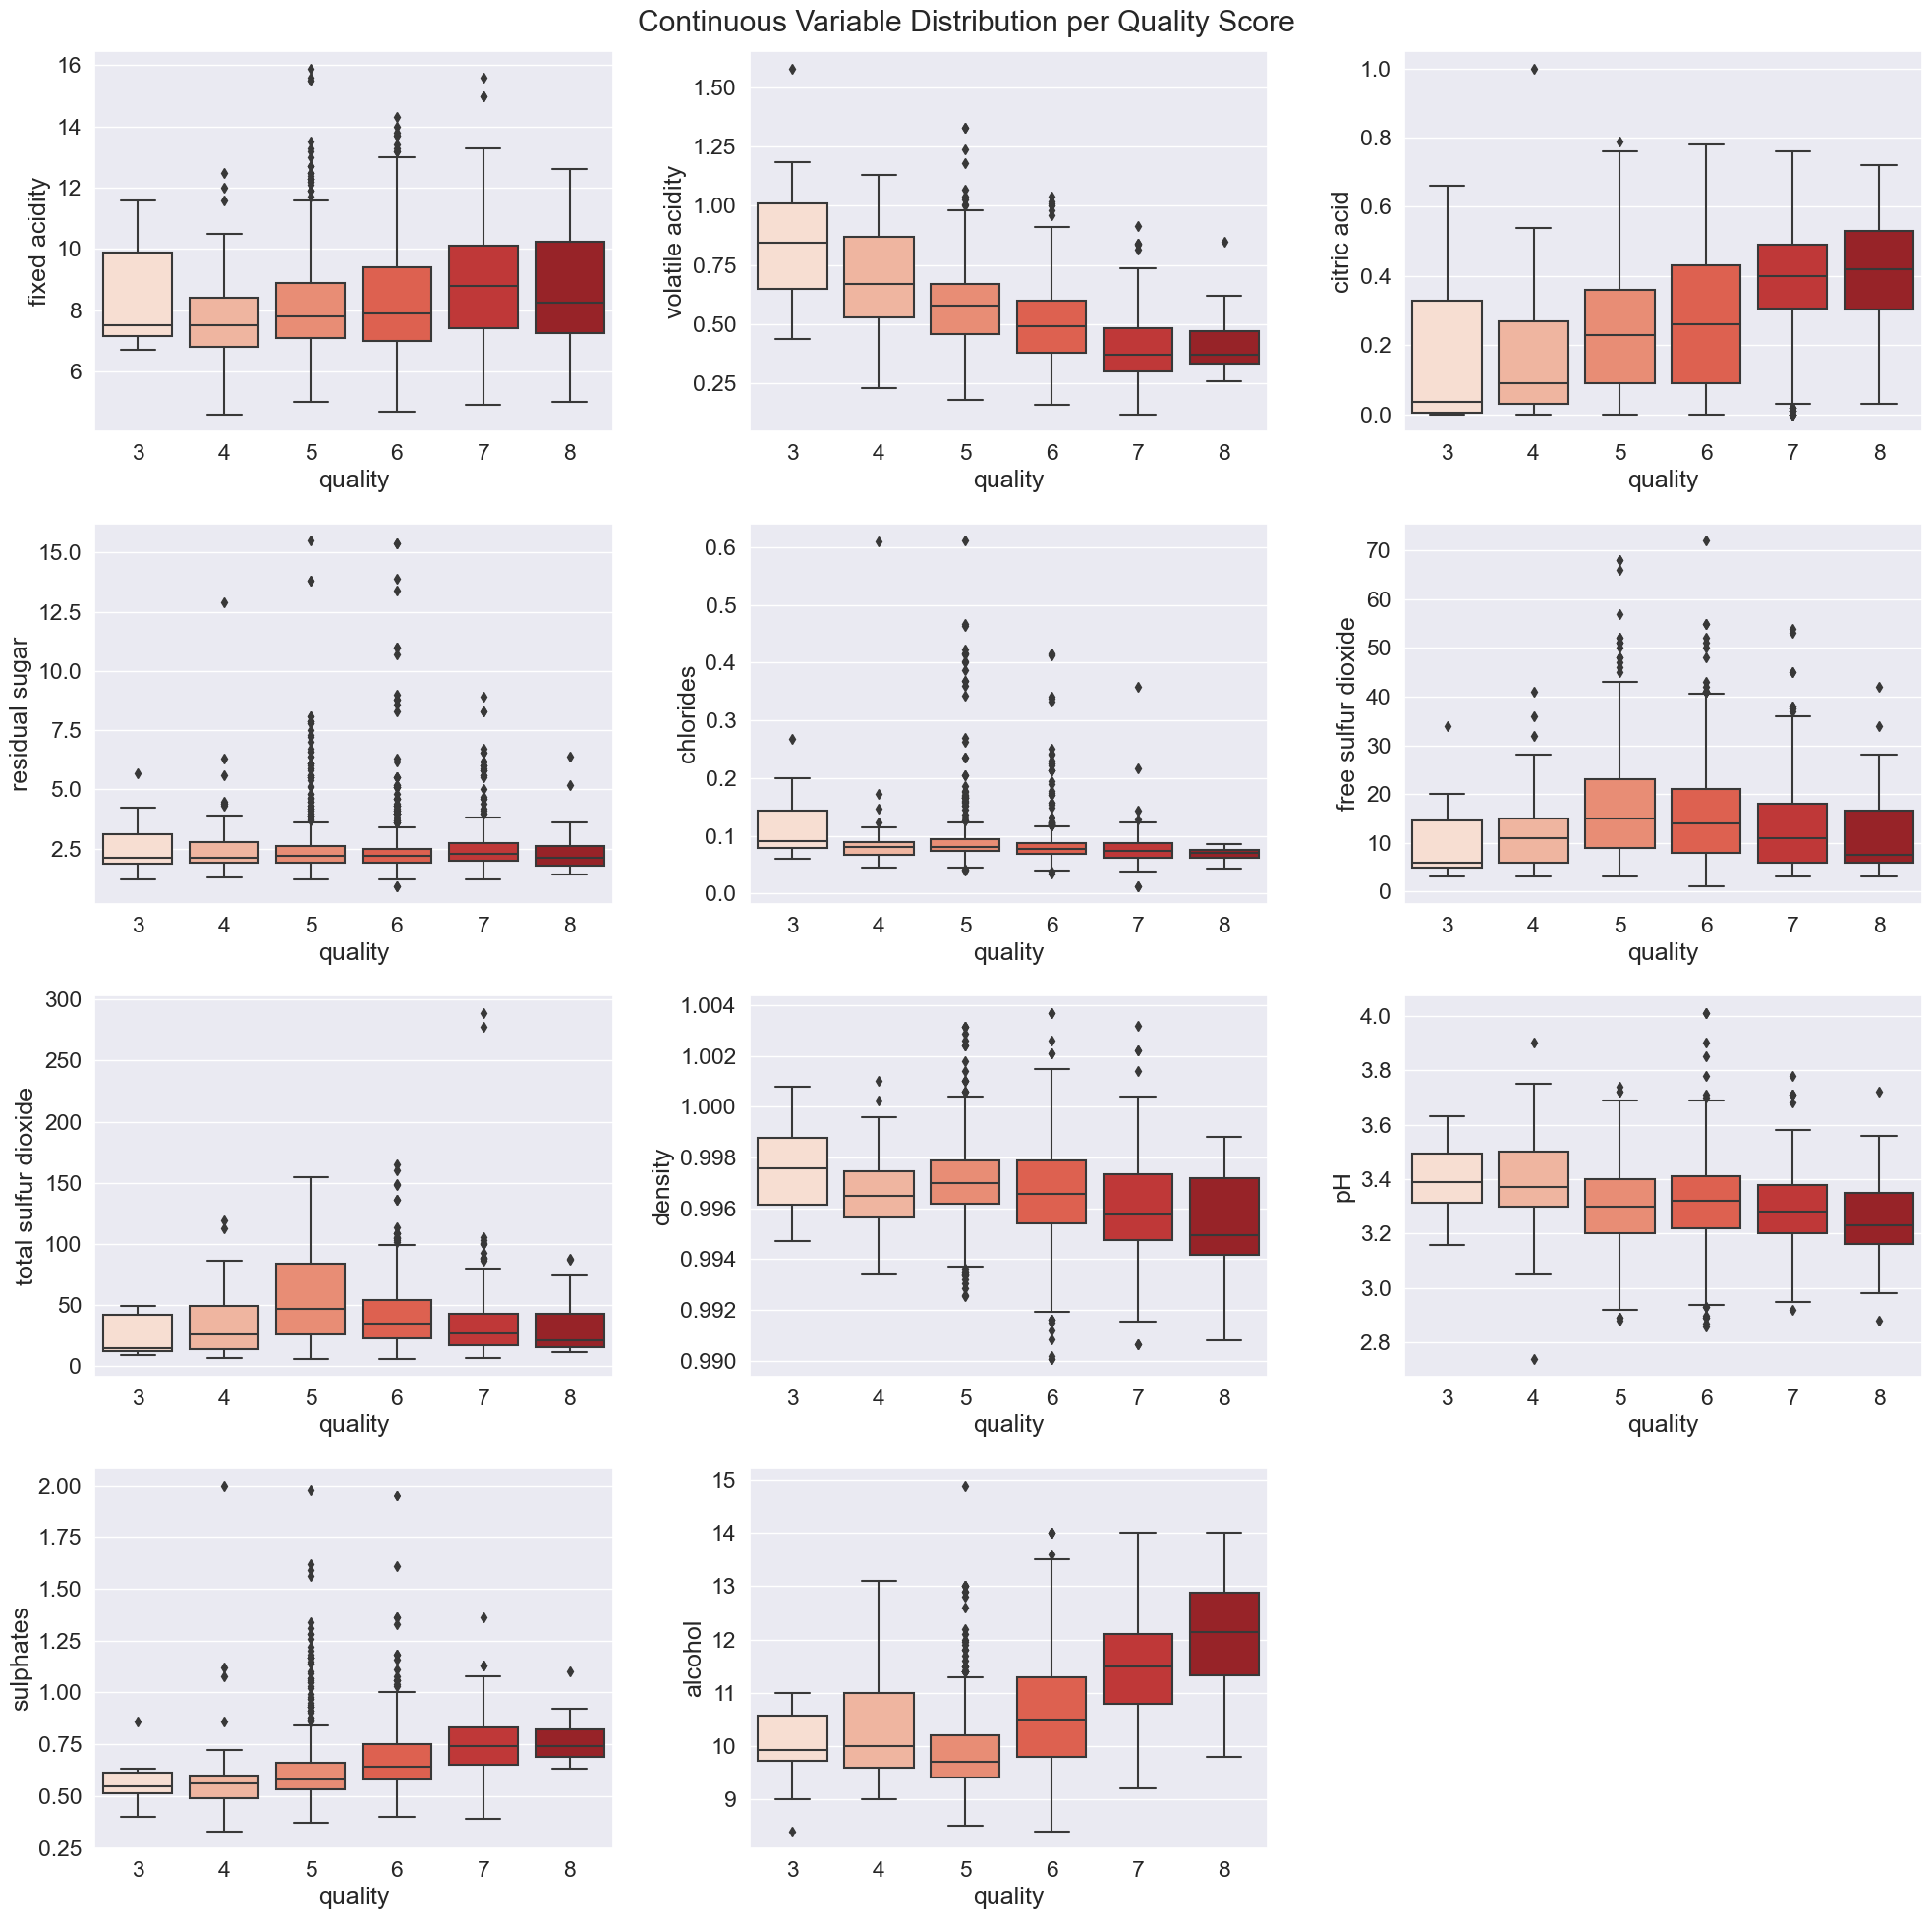

In [52]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.5)

for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = df, x='quality', y=col, ax=ax, palette = 'Reds')
    
plt.suptitle('Continuous Variable Distribution per Quality Score')
plt.tight_layout()

##### Σύμφωνα με το διάγραμμα συσχέτισης αλλά και με βάση τα θηκογράμματα, συμπεραίνουμε οτι μεγαλύτερο ρόλο στην ποιότητα του κρασιού παίζουν τα παρακάτω χαρακτηριστικά:
##### 1) alcohol
##### 2) sulphates
##### 3) citric acid
##### 4) volatile acidity

## 5) Προετοιμασία για την δημιουργία των Μοντέλων

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
from sklearn import metrics

### 5.1) Προετοιμασία των δεδομένων

##### Επειδή τα δεδομένα μου οπως φαίνεται και στο ραβδόγραμμα πιο πάνω είναι μη ισορροπημένα, θα χρειαστεί να να τα τροποποιήσω έτσι ώστε το μοντέλο μου να λειτουργεί σωστά.


In [54]:
from imblearn.over_sampling import SMOTE 

In [55]:
strategy={3:500,4:500,7:500,8:500}
oversample = SMOTE(sampling_strategy=strategy)
features, labels =  oversample.fit_resample(df.drop(["quality"],axis=1), df["quality"])

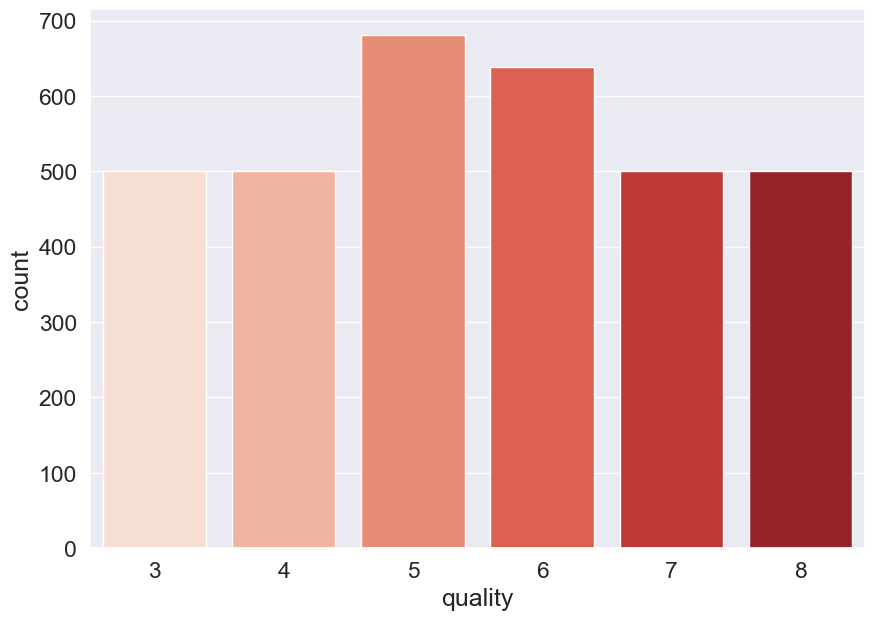

In [56]:
plt.figure(figsize=(10,7))
sns.countplot(x=labels,data=features,palette='Reds')
plt.show()

##### Έπειτα,θα χρειαστεί να κανονικοποιήσουμε τα δεδομένα μας έτσι ωστε τα μοντέλα να μπορέσουν να τα διαχειριστούν καλύτερα.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.583650,0.498276,-1.345644,-0.555478,-0.291896,-0.278402,-0.132240,0.666603,1.212486,-0.610003,-1.080124
1,-0.340497,1.247015,-1.345644,0.014302,0.175210,1.146891,0.984212,0.133326,-0.805965,0.141047,-0.740125
2,-0.340497,0.747856,-1.147208,-0.229889,0.047817,0.128825,0.544397,0.239982,-0.415297,-0.046716,-0.740125
3,1.726297,-1.248782,1.432468,-0.555478,-0.313128,0.332438,0.747389,0.773259,-1.066410,-0.484828,-0.740125
4,-0.583650,0.498276,-1.345644,-0.555478,-0.291896,-0.278402,-0.132240,0.666603,1.212486,-0.610003,-1.080124


In [59]:
scaled_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03,3.319000e+03
mean,4.367301e-16,2.911534e-16,1.712667e-17,1.091825e-16,2.997167e-17,2.055200e-16,1.712667e-17,-3.205256e-14,-1.952440e-15,1.883934e-16,1.472894e-15
std,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00
min,-2.285716e+00,-1.914328e+00,-1.345644e+00,-1.369448e+00,-1.650749e+00,-1.296468e+00,-1.079532e+00,-3.455630e+00,-3.801086e+00,-2.049515e+00,-1.930121e+00
25%,-7.052259e-01,-7.912192e-01,-9.830668e-01,-5.537142e-01,-4.193992e-01,-7.874352e-01,-7.412136e-01,-6.112656e-01,-7.072730e-01,-6.725905e-01,-8.251247e-01
50%,-2.189212e-01,-1.672699e-01,-3.370740e-02,-3.112865e-01,-2.281996e-01,-2.784019e-01,-3.352312e-01,2.482993e-02,-2.462879e-02,-1.718908e-01,-1.451268e-01
75%,6.314011e-01,5.190745e-01,8.121077e-01,1.537686e-01,4.781736e-02,4.342446e-01,3.752380e-01,6.160474e-01,6.422777e-01,5.165713e-01,6.198707e-01
max,4.583337e+00,4.158779e+00,3.615271e+00,1.051452e+01,1.106726e+01,5.931804e+00,8.494886e+00,3.807606e+00,4.468053e+00,8.402592e+00,3.594861e+00


In [60]:
new_df=pd.concat([scaled_df,labels],sort=False,axis=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.583650,0.498276,-1.345644,-0.555478,-0.291896,-0.278402,-0.132240,0.666603,1.212486,-0.610003,-1.080124,5
1,-0.340497,1.247015,-1.345644,0.014302,0.175210,1.146891,0.984212,0.133326,-0.805965,0.141047,-0.740125,5
2,-0.340497,0.747856,-1.147208,-0.229889,0.047817,0.128825,0.544397,0.239982,-0.415297,-0.046716,-0.740125,5
3,1.726297,-1.248782,1.432468,-0.555478,-0.313128,0.332438,0.747389,0.773259,-1.066410,-0.484828,-0.740125,6
4,-0.583650,0.498276,-1.345644,-0.555478,-0.291896,-0.278402,-0.132240,0.666603,1.212486,-0.610003,-1.080124,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3314,-0.078418,-0.765066,0.510688,-0.658321,-0.500911,-0.867905,-0.867627,-0.623225,-0.035157,0.879731,0.494151,8
3315,-0.263674,-0.174716,0.349947,-0.066328,-0.293096,-0.586699,-0.707701,-2.215390,-0.809032,0.387269,2.048049,8
3316,-0.484201,-0.671023,0.207558,-0.450444,-0.320466,0.032640,-0.548047,-1.579584,-0.630736,0.307178,1.092670,8
3317,0.017863,-0.722712,0.544363,-0.649112,-0.484097,-0.833352,-0.871455,-0.673903,0.053239,0.589421,0.657629,8


##### Στο σημείο αυτό θα χωρίσουμε τα δεδομένα μας σε δεδομένα εκπαίδευσης και δεδομένα δοκιμής. Θα χρησιμοποιήσω το 20% των δεδομένων μου έτσι ώστε να τεστάρουμε την αποδοτικότητα των μοντέλων μας.

In [61]:
X = new_df.drop('quality', axis = 1)
Y = new_df['quality']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the Y_train: {Y_train.shape}')
print(f'Shape of the Y_test: {Y_test.shape}')

Shape of the X_train: (2655, 11)
Shape of the X_test: (664, 11)
Shape of the Y_train: (2655,)
Shape of the Y_test: (664,)


### Δημιουργία των Μοντέλων

In [64]:
model_comp={}
import warnings
warnings.filterwarnings('ignore')

#### 1. K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
train_scores, test_scores = list(), list()

In [67]:
values = [i for i in range(1, 50)]
for i in values:
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,Y_train)
    train_yhat = k.predict(X_train)
    train_acc = accuracy_score(Y_train, train_yhat)
    train_scores.append(train_acc)
    y_K=k.predict(X_test)
    test_acc = accuracy_score(Y_test, y_K)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.798
>2, train: 0.923, test: 0.771
>3, train: 0.892, test: 0.748
>4, train: 0.850, test: 0.726
>5, train: 0.831, test: 0.720
>6, train: 0.806, test: 0.717
>7, train: 0.791, test: 0.712
>8, train: 0.777, test: 0.715
>9, train: 0.775, test: 0.690
>10, train: 0.767, test: 0.688
>11, train: 0.752, test: 0.688
>12, train: 0.746, test: 0.687
>13, train: 0.744, test: 0.678
>14, train: 0.735, test: 0.678
>15, train: 0.728, test: 0.678
>16, train: 0.720, test: 0.669
>17, train: 0.715, test: 0.670
>18, train: 0.709, test: 0.660
>19, train: 0.705, test: 0.660
>20, train: 0.701, test: 0.663
>21, train: 0.699, test: 0.654
>22, train: 0.701, test: 0.646
>23, train: 0.696, test: 0.636
>24, train: 0.689, test: 0.636
>25, train: 0.687, test: 0.640
>26, train: 0.683, test: 0.645
>27, train: 0.679, test: 0.642
>28, train: 0.675, test: 0.648
>29, train: 0.673, test: 0.649
>30, train: 0.673, test: 0.637
>31, train: 0.671, test: 0.643
>32, train: 0.667, test: 0.643
>33, train: 0.670

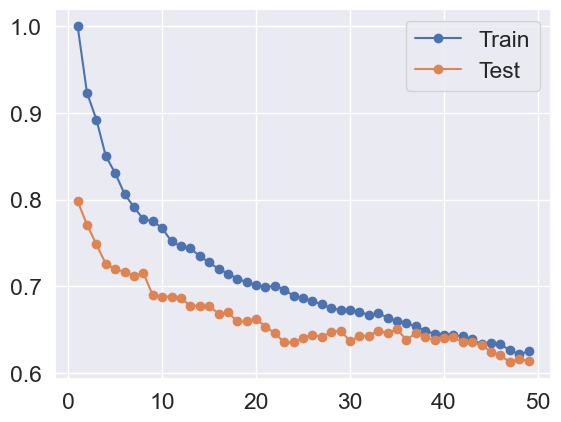

In [68]:
plt.plot( values,train_scores, '-o', label='Train')
plt.plot( values,test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [69]:
k=KNeighborsClassifier(n_neighbors=8)
k.fit(X_train,Y_train)
y_K=k.predict(X_test)

print('Accuracy score of the Model: ',accuracy_score(Y_test,y_K))
print('F1 score of the Model: ',f1_score(Y_test,y_K,average='weighted'))
print(classification_report(Y_test,y_K))

model_comp['KNN']=[accuracy_score(y_K,Y_test),f1_score(Y_test,y_K,average='weighted')]

Accuracy score of the Model:  0.7153614457831325
F1 score of the Model:  0.6957881391813897
              precision    recall  f1-score   support

           3       0.85      1.00      0.92        91
           4       0.66      0.87      0.75        95
           5       0.68      0.59      0.63       145
           6       0.57      0.33      0.42       137
           7       0.63      0.72      0.67        85
           8       0.85      0.98      0.91       111

    accuracy                           0.72       664
   macro avg       0.71      0.75      0.72       664
weighted avg       0.70      0.72      0.70       664



Confusion matrix


[Text(0.5, 14.049999999999999, 'Predicted'), Text(41.25, 0.5, 'Actual')]

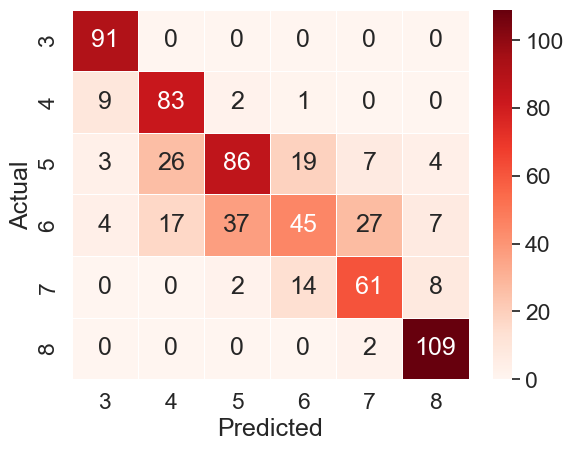

In [70]:
print('Confusion matrix')
cm = confusion_matrix(Y_test,k.predict(X_test))
ht=sns.heatmap(cm,annot=True,fmt="d",cmap ='Reds',xticklabels=[3,4,5,6,7,8],yticklabels=[3,4,5,6,7,8],linewidths = .5)
ht.set(xlabel="Predicted", ylabel="Actual")

#### 2. Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
train_scores, test_scores = list(), list()

In [73]:
values = [i for i in range(1, 21)]
for i in values:
 # configure the model
 Tree_model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 Tree_model.fit(X_train, Y_train)
 # evaluate on the train dataset
 train_yhat = Tree_model.predict(X_train)
 train_acc = accuracy_score(Y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = Tree_model.predict(X_test)
 test_acc = accuracy_score(Y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.317, test: 0.342
>2, train: 0.433, test: 0.461
>3, train: 0.497, test: 0.483
>4, train: 0.547, test: 0.535
>5, train: 0.635, test: 0.539
>6, train: 0.670, test: 0.575
>7, train: 0.732, test: 0.661
>8, train: 0.787, test: 0.681
>9, train: 0.830, test: 0.702
>10, train: 0.875, test: 0.724
>11, train: 0.904, test: 0.741
>12, train: 0.937, test: 0.732
>13, train: 0.957, test: 0.721
>14, train: 0.969, test: 0.732
>15, train: 0.982, test: 0.735
>16, train: 0.987, test: 0.736
>17, train: 0.992, test: 0.745
>18, train: 0.997, test: 0.739
>19, train: 0.999, test: 0.750
>20, train: 1.000, test: 0.748


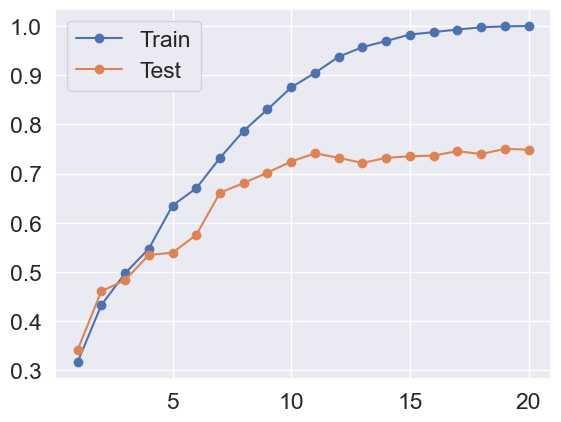

In [74]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [75]:
Tree_model=DecisionTreeClassifier(max_depth=11)
Tree_model.fit(X_train,Y_train)
y_Tr=Tree_model.predict(X_test)
print('Accuracy score of the Model: ',accuracy_score(Y_test,y_Tr))
print('F1 score of the Model: ',f1_score(Y_test,y_Tr,average='weighted'))
print(classification_report(Y_test,y_Tr))
model_comp['decision tree']=[accuracy_score(y_Tr,Y_test),f1_score(Y_test,y_Tr,average='weighted')]

Accuracy score of the Model:  0.733433734939759
F1 score of the Model:  0.7318390091193894
              precision    recall  f1-score   support

           3       0.93      0.96      0.94        91
           4       0.84      0.85      0.84        95
           5       0.63      0.61      0.62       145
           6       0.52      0.50      0.51       137
           7       0.66      0.69      0.67        85
           8       0.93      0.93      0.93       111

    accuracy                           0.73       664
   macro avg       0.75      0.76      0.75       664
weighted avg       0.73      0.73      0.73       664



Confusion matrix


[Text(0.5, 14.049999999999999, 'Predicted'), Text(41.25, 0.5, 'Actual')]

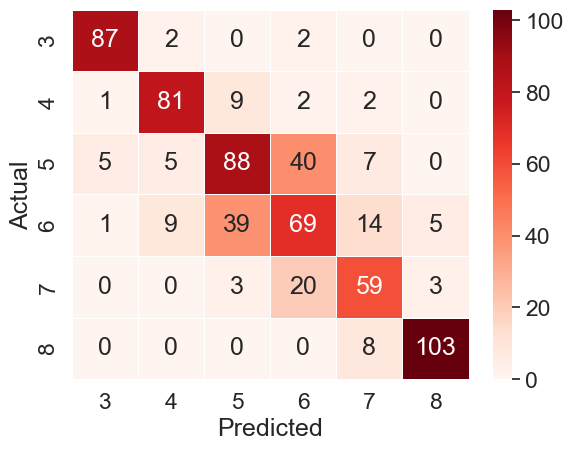

In [76]:
print('Confusion matrix')
cm = confusion_matrix(Y_test,Tree_model.predict(X_test))
ht=sns.heatmap(cm,annot=True,fmt="d",cmap ='Reds',xticklabels=[3,4,5,6,7,8],yticklabels=[3,4,5,6,7,8],linewidths = .5)
ht.set(xlabel="Predicted", ylabel="Actual")

#### 3.Support Vector Machine

In [77]:
from sklearn.svm import SVC

In [78]:
train_scores, test_scores = list(), list()

In [79]:
values = [i for i in range(1, 20)]
for i in values:
    S=SVC(C=i, kernel='rbf',gamma=0.4,tol=0.5)
    S.fit(X_train,Y_train)
    train_yhat = S.predict(X_train)
    train_acc = accuracy_score(Y_train, train_yhat)
    train_scores.append(train_acc)
    y_S=S.predict(X_test)
    test_acc = accuracy_score(Y_test, y_S)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.909, test: 0.791
>2, train: 0.943, test: 0.810
>3, train: 0.957, test: 0.810
>4, train: 0.969, test: 0.804
>5, train: 0.978, test: 0.807
>6, train: 0.980, test: 0.813
>7, train: 0.986, test: 0.807
>8, train: 0.987, test: 0.810
>9, train: 0.989, test: 0.810
>10, train: 0.990, test: 0.809
>11, train: 0.991, test: 0.809
>12, train: 0.992, test: 0.810
>13, train: 0.992, test: 0.810
>14, train: 0.994, test: 0.806
>15, train: 0.993, test: 0.812
>16, train: 0.993, test: 0.810
>17, train: 0.993, test: 0.806
>18, train: 0.995, test: 0.812
>19, train: 0.995, test: 0.812


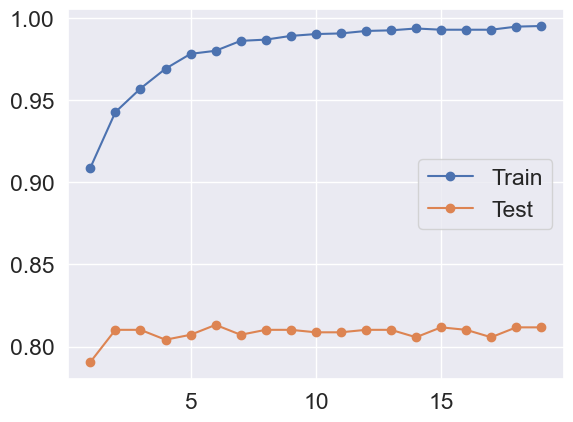

In [80]:
plt.plot( values,train_scores, '-o', label='Train')
plt.plot( values,test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [81]:
S=SVC(C=3, kernel='rbf',gamma=0.4,tol=0.5)
S.fit(X_train,Y_train)
y_S=S.predict(X_test)

print('Accuracy score of the Model: ',accuracy_score(Y_test,y_S))
print('F1 score of the Model: ',f1_score(Y_test,y_S,average='weighted'))
print(classification_report(Y_test,y_S))


model_comp['SVC']=[accuracy_score(y_S,Y_test),f1_score(Y_test,y_S,average='weighted')]

Accuracy score of the Model:  0.8102409638554217
F1 score of the Model:  0.80305138224669
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        91
           4       0.86      0.96      0.91        95
           5       0.67      0.74      0.70       145
           6       0.64      0.47      0.54       137
           7       0.81      0.86      0.83        85
           8       0.97      1.00      0.98       111

    accuracy                           0.81       664
   macro avg       0.82      0.84      0.83       664
weighted avg       0.80      0.81      0.80       664



Confusion matrix


[Text(0.5, 14.049999999999999, 'Predicted'), Text(41.25, 0.5, 'Actual')]

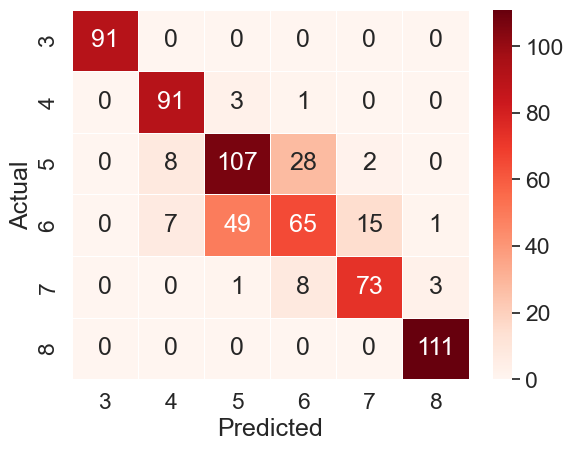

In [82]:
print('Confusion matrix')
cm = confusion_matrix(Y_test,S.predict(X_test))
ht=sns.heatmap(cm,annot=True,fmt="d",cmap ='Reds',xticklabels=[3,4,5,6,7,8],yticklabels=[3,4,5,6,7,8],linewidths = .5)
ht.set(xlabel="Predicted", ylabel="Actual")

In [83]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Reds')

,Accuracy,F1_score
KNN,0.715361,0.695788
decision tree,0.733434,0.731839
SVC,0.810241,0.803051


In [84]:
Y_test = Y_test.reset_index(drop=True)
predictions = np.round(S.predict(X_test))
d1= pd.DataFrame(predictions, columns= ['SVC'])


predictions = np.round(Tree_model.predict((X_test))).astype(int)
d2= pd.DataFrame(predictions,columns= ['Decision Tree'])


predictions = np.round(k.predict((X_test))).astype(int)
d3 = pd.DataFrame(predictions,columns= ['KNN'])


fin = pd.concat([d1,d2,d3,Y_test],axis=1)
fin

,SVC,Decision Tree,KNN,quality
0,6,7,6,6
1,4,4,4,4
2,7,7,7,7
3,7,7,7,7
4,8,8,8,8
...,...,...,...,...
659,4,4,4,4
660,5,6,8,5
661,8,8,8,8
662,3,3,3,3
